# Stock Price Prediction Using Regression

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler



# We will be predicting the value of Netflix market share by using their past records

In [2]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


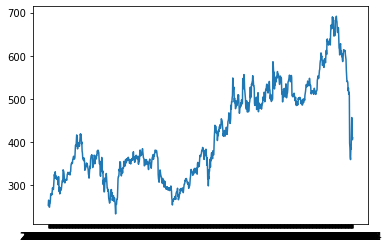

In [34]:
from matplotlib import pyplot as plt
plt.plot(df.Date,df.Close)
plt.show()

In [3]:
#open - the starting price for a given trading day
#close - the final price on that day
#high - the highest price at which that stock traded on that day
#volume - the total number of shares traded before the market is closed on that date


In [4]:
def generate_features(df):
    df_new=pd.DataFrame()
    df_new['open']=df['Open']
    df_new['open_1']=df['Open'].shift(1)
    df_new['close_1']=df["Close"].shift(1)
    df_new['high_1']=df["High"].shift(1)
    df_new['low_1']=df["Low"].shift(1)
    df_new['volume_1']=df["Volume"].shift(1)
    
    #average price
    
    df_new['avg_price_5']=df['Close'].rolling(5).mean().shift(1) 
    df_new['avg_price_30']=df['Close'].rolling(21).mean().shift(1)  
    df_new['avg_price_365']=df['Close'].rolling(252).mean().shift(1)  
    df_new['ratio_avg_price_5_30']=df_new['avg_price_5']/df_new['avg_price_30']
    df_new['ratio_avg_price_30_365']=df_new['avg_price_30']/df_new['avg_price_365']
    df_new['ratio_avg_price_5_365']=df_new['avg_price_5']/df_new['avg_price_365']
    
     #average volume
    
    df_new['avg_volume_5']=df['Volume'].rolling(5).mean().shift(1) 
    df_new['avg_volume_30']=df['Volume'].rolling(21).mean().shift(1)  
    df_new['avg_volume_365']=df['Volume'].rolling(252).mean().shift(1)  
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5']/df_new['avg_volume_30']
    df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30']/df_new['avg_volume_365']
    df_new['ratio_avg_volume_5_365']=df_new['avg_volume_5']/df_new['avg_volume_365']
     
        
    #standard deviation of prices

    
    df_new['std_price_5']=df['Close'].rolling(5).std().shift(1) 
    df_new['std_price_30']=df['Close'].rolling(21).std().shift(1)  
    df_new['std_price_365']=df['Close'].rolling(252).std().shift(1)  
    df_new['ratio_std_price_5_30']=df_new['std_price_5']/df_new['std_price_30']
    df_new['ratio_std_price_30_365']=df_new['std_price_30']/df_new['std_price_365']
    df_new['ratio_std_price_5_365']=df_new['std_price_5']/df_new['std_price_365']
    
    #standard deviation of volume
    
    df_new['std_volume_5']=df['Close'].rolling(5).std().shift(1) 
    df_new['std_volume_30']=df['Close'].rolling(21).std().shift(1)  
    df_new['std_volume_365']=df['Close'].rolling(252).std().shift(1)  
    df_new['ratio_std_volume_5_30']=df_new['std_volume_5']/df_new['std_volume_30']
    df_new['ratio_std_volume_30_365']=df_new['std_volume_30']/df_new['std_volume_365']
    df_new['ratio_std_volume_5_365']=df_new['std_volume_5']/df_new['std_volume_365']
    
    #the target
    
    df_new['close']=df['Close']
    df_new=df_new.dropna(axis=0)
    return df_new
    

In [5]:
data=generate_features(df)
data

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_5_30,ratio_std_price_30_365,ratio_std_price_5_365,std_volume_5,std_volume_30,std_volume_365,ratio_std_volume_5_30,ratio_std_volume_30_365,ratio_std_volume_5_365,close
252,357.000000,353.200012,355.809998,360.000000,352.899994,9046600.0,345.432001,335.841429,327.807143,1.028557,...,0.612042,0.305459,0.186954,7.611283,12.435878,40.712129,0.612042,0.305459,0.186954,352.190002
253,347.899994,357.000000,352.190002,357.040009,347.190002,6717700.0,347.738000,337.596191,328.195754,1.030041,...,0.629715,0.296246,0.186551,7.550446,11.990257,40.473991,0.629715,0.296246,0.186551,344.709991
254,338.000000,347.899994,344.709991,348.750000,339.019989,7864500.0,348.779999,338.760001,328.509207,1.029578,...,0.561734,0.282819,0.158869,6.401413,11.395812,40.293686,0.561734,0.282819,0.158869,347.570007
255,350.000000,338.000000,347.570007,348.000000,338.000000,7561400.0,350.323999,340.074764,328.838612,1.030138,...,0.401601,0.266512,0.107031,4.292783,10.689167,40.107691,0.401601,0.266512,0.107031,345.730011
256,348.089996,350.000000,345.730011,352.869995,344.809998,5454900.0,349.202002,341.078097,329.218096,1.023818,...,0.460999,0.254827,0.117475,4.676806,10.144932,39.811038,0.460999,0.254827,0.117475,359.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,386.760010,384.359985,387.000000,372.079987,11966600.0,376.866003,502.117144,555.520911,0.750554,...,0.152230,1.370477,0.208628,12.868740,84.534794,61.682745,0.152230,1.370477,0.208628,427.140015
1005,432.959991,401.970001,427.140015,427.700012,398.200012,20047500.0,384.864007,493.310000,555.076864,0.780167,...,0.320183,1.319948,0.422624,26.288274,82.103983,62.202451,0.320183,1.319948,0.422624,457.130005
1006,448.250000,432.959991,457.130005,458.480011,425.540009,22542300.0,403.006006,486.390477,554.715634,0.828565,...,0.493467,1.255722,0.619657,38.732500,78.490585,62.506357,0.493467,1.255722,0.619657,429.480011
1007,421.440002,448.250000,429.480011,451.980011,426.480011,14346000.0,416.962006,478.395716,554.279245,0.871584,...,0.413244,1.192127,0.492640,31.034016,75.098451,62.995325,0.413244,1.192127,0.492640,405.600006


In [6]:
data.dropna()

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_5_30,ratio_std_price_30_365,ratio_std_price_5_365,std_volume_5,std_volume_30,std_volume_365,ratio_std_volume_5_30,ratio_std_volume_30_365,ratio_std_volume_5_365,close
252,357.000000,353.200012,355.809998,360.000000,352.899994,9046600.0,345.432001,335.841429,327.807143,1.028557,...,0.612042,0.305459,0.186954,7.611283,12.435878,40.712129,0.612042,0.305459,0.186954,352.190002
253,347.899994,357.000000,352.190002,357.040009,347.190002,6717700.0,347.738000,337.596191,328.195754,1.030041,...,0.629715,0.296246,0.186551,7.550446,11.990257,40.473991,0.629715,0.296246,0.186551,344.709991
254,338.000000,347.899994,344.709991,348.750000,339.019989,7864500.0,348.779999,338.760001,328.509207,1.029578,...,0.561734,0.282819,0.158869,6.401413,11.395812,40.293686,0.561734,0.282819,0.158869,347.570007
255,350.000000,338.000000,347.570007,348.000000,338.000000,7561400.0,350.323999,340.074764,328.838612,1.030138,...,0.401601,0.266512,0.107031,4.292783,10.689167,40.107691,0.401601,0.266512,0.107031,345.730011
256,348.089996,350.000000,345.730011,352.869995,344.809998,5454900.0,349.202002,341.078097,329.218096,1.023818,...,0.460999,0.254827,0.117475,4.676806,10.144932,39.811038,0.460999,0.254827,0.117475,359.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,386.760010,384.359985,387.000000,372.079987,11966600.0,376.866003,502.117144,555.520911,0.750554,...,0.152230,1.370477,0.208628,12.868740,84.534794,61.682745,0.152230,1.370477,0.208628,427.140015
1005,432.959991,401.970001,427.140015,427.700012,398.200012,20047500.0,384.864007,493.310000,555.076864,0.780167,...,0.320183,1.319948,0.422624,26.288274,82.103983,62.202451,0.320183,1.319948,0.422624,457.130005
1006,448.250000,432.959991,457.130005,458.480011,425.540009,22542300.0,403.006006,486.390477,554.715634,0.828565,...,0.493467,1.255722,0.619657,38.732500,78.490585,62.506357,0.493467,1.255722,0.619657,429.480011
1007,421.440002,448.250000,429.480011,451.980011,426.480011,14346000.0,416.962006,478.395716,554.279245,0.871584,...,0.413244,1.192127,0.492640,31.034016,75.098451,62.995325,0.413244,1.192127,0.492640,405.600006


In [7]:
data_x=data.drop('close',axis=1)
data_y=data["close"]
data_x

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,std_price_365,ratio_std_price_5_30,ratio_std_price_30_365,ratio_std_price_5_365,std_volume_5,std_volume_30,std_volume_365,ratio_std_volume_5_30,ratio_std_volume_30_365,ratio_std_volume_5_365
252,357.000000,353.200012,355.809998,360.000000,352.899994,9046600.0,345.432001,335.841429,327.807143,1.028557,...,40.712129,0.612042,0.305459,0.186954,7.611283,12.435878,40.712129,0.612042,0.305459,0.186954
253,347.899994,357.000000,352.190002,357.040009,347.190002,6717700.0,347.738000,337.596191,328.195754,1.030041,...,40.473991,0.629715,0.296246,0.186551,7.550446,11.990257,40.473991,0.629715,0.296246,0.186551
254,338.000000,347.899994,344.709991,348.750000,339.019989,7864500.0,348.779999,338.760001,328.509207,1.029578,...,40.293686,0.561734,0.282819,0.158869,6.401413,11.395812,40.293686,0.561734,0.282819,0.158869
255,350.000000,338.000000,347.570007,348.000000,338.000000,7561400.0,350.323999,340.074764,328.838612,1.030138,...,40.107691,0.401601,0.266512,0.107031,4.292783,10.689167,40.107691,0.401601,0.266512,0.107031
256,348.089996,350.000000,345.730011,352.869995,344.809998,5454900.0,349.202002,341.078097,329.218096,1.023818,...,39.811038,0.460999,0.254827,0.117475,4.676806,10.144932,39.811038,0.460999,0.254827,0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,386.760010,384.359985,387.000000,372.079987,11966600.0,376.866003,502.117144,555.520911,0.750554,...,61.682745,0.152230,1.370477,0.208628,12.868740,84.534794,61.682745,0.152230,1.370477,0.208628
1005,432.959991,401.970001,427.140015,427.700012,398.200012,20047500.0,384.864007,493.310000,555.076864,0.780167,...,62.202451,0.320183,1.319948,0.422624,26.288274,82.103983,62.202451,0.320183,1.319948,0.422624
1006,448.250000,432.959991,457.130005,458.480011,425.540009,22542300.0,403.006006,486.390477,554.715634,0.828565,...,62.506357,0.493467,1.255722,0.619657,38.732500,78.490585,62.506357,0.493467,1.255722,0.619657
1007,421.440002,448.250000,429.480011,451.980011,426.480011,14346000.0,416.962006,478.395716,554.279245,0.871584,...,62.995325,0.413244,1.192127,0.492640,31.034016,75.098451,62.995325,0.413244,1.192127,0.492640


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)

In [9]:
x_train

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,std_price_365,ratio_std_price_5_30,ratio_std_price_30_365,ratio_std_price_5_365,std_volume_5,std_volume_30,std_volume_365,ratio_std_volume_5_30,ratio_std_volume_30_365,ratio_std_volume_5_365
315,367.920013,377.000000,370.459991,379.910004,365.809998,6974900.0,378.406000,368.728096,343.449365,1.026247,...,37.682071,0.512019,0.268912,0.137688,5.188378,10.133165,37.682071,0.512019,0.268912,0.137688
595,441.820007,425.760010,436.130005,437.959991,425.179993,5507900.0,427.948004,427.957145,343.169483,0.999979,...,51.821545,0.632067,0.225841,0.142746,7.397337,11.703409,51.821545,0.632067,0.225841,0.142746
904,603.840027,594.690002,606.710022,613.849976,593.989990,5821400.0,587.410010,547.177620,517.631150,1.073527,...,26.039690,0.468238,1.118552,0.523749,13.638263,29.126757,26.039690,0.468238,1.118552,0.523749
398,285.320007,291.250000,291.519989,292.380005,286.510010,4652500.0,292.621997,300.174760,335.660079,0.974839,...,35.389921,0.344307,0.230682,0.079426,2.810865,8.163832,35.389921,0.344307,0.230682,0.079426
690,502.010010,488.500000,504.209991,513.900024,479.339996,11120700.0,491.179993,517.018091,414.026785,0.950025,...,77.360879,0.322764,0.294505,0.095056,7.353580,22.783128,77.360879,0.322764,0.294505,0.095056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,314.390015,315.779999,314.660004,316.619995,313.339996,2411700.0,313.821997,298.567618,324.939642,1.051092,...,38.368740,0.206879,0.289174,0.059824,2.295374,11.095239,38.368740,0.206879,0.289174,0.059824
489,338.679993,344.399994,338.690002,345.380005,335.519989,7199400.0,336.316003,327.946667,329.732221,1.025520,...,34.008442,0.397142,0.319123,0.126737,4.310140,10.852893,34.008442,0.397142,0.319123,0.126737
429,289.359985,304.489990,293.350006,308.750000,288.299988,38258900.0,286.467999,273.366666,325.939761,1.047926,...,38.363519,0.406198,0.260102,0.105653,4.053215,9.978422,38.363519,0.406198,0.260102,0.105653
965,622.750000,617.099976,616.469971,625.359985,612.880005,3331100.0,641.124011,661.588574,551.091308,0.969068,...,55.013825,1.132201,0.382536,0.433107,23.826900,21.044764,55.013825,1.132201,0.382536,0.433107


In [29]:
%%capture --no-display
#Using Linear Regression
scaler = StandardScaler()
# Transforming data into standard normalized data having mean = 0 and standard variance = 1
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.fit_transform(x_test)
param_grid={
    "alpha":[1e-5,3e-5,1e-4],
    "eta0":[0.01,0.03,0.1]
}

# Finding out the best hyperparameter
from sklearn.linear_model import SGDRegressor
lr=SGDRegressor(penalty="l2",max_iter=120)
grid_search =  GridSearchCV(lr,param_grid,cv=6,scoring="r2")
grid_search.fit(x_scaled_train,y_train)
print(grid_search.best_params_)

C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

{'alpha': 3e-05, 'eta0': 0.03}


C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mridu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

In [30]:
(x_scaled_train)

array([[-0.76873693, -0.68318421, -0.74631758, ..., -0.21318818,
        -0.49122346, -0.40134302],
       [-0.06856643, -0.22235998, -0.122282  , ...,  0.14982241,
        -0.7169634 , -0.36553677],
       [ 1.46650323,  1.37417444,  1.4986709 , ..., -0.34557774,
         3.96178457,  2.33156151],
       ...,
       [-1.51305923, -1.36846647, -1.47906258, ..., -0.53318101,
        -0.53739848, -0.62811979],
       [ 1.64566705,  1.58596807,  1.59141575, ...,  1.66217469,
         0.10428467,  1.68991459],
       [-1.58402365, -1.61834734, -1.5882476 , ...,  0.56411173,
        -0.88488036, -0.32093086]])

In [31]:
lr_best = grid_search.best_estimator_
predictions_lr=lr_best.predict(x_scaled_test)
predictions_lr


array([509.74231515, 545.253573  , 418.44010384, 315.09852227,
       359.19457907, 479.88715558, 373.87609136, 423.23696087,
       530.41165383, 502.5941951 , 617.73814783, 511.48577801,
       410.6625438 , 511.25412698, 492.10545304, 367.58775571,
       390.213194  , 493.11475775, 520.16557843, 423.58071998,
       545.77616452, 371.7006132 , 593.29411785, 272.8495781 ,
       600.29051426, 477.69789318, 545.13347903, 327.87761984,
       504.89929667, 570.23534357, 538.60370606, 387.98796602,
       365.87674668, 519.83980284, 643.44783633, 359.87564605,
       443.57038646, 383.7767592 , 531.76560804, 486.5573372 ,
       324.01040407, 372.06964286, 313.70292792, 484.50978493,
       467.13443987, 526.18131229, 512.20309165, 516.69845277,
       597.8944407 , 505.21882236, 315.7744303 , 435.80287903,
       603.04061731, 494.10160067, 362.25396653, 487.4196187 ,
       511.88435208, 345.91389559, 418.71244544, 617.3578962 ,
       476.64396399, 341.18929906, 548.18796808, 497.09

In [32]:
print('MSE:{0:.3f}'.format(mean_squared_error(y_test,predictions_lr)))
print('MAE:{0:.3f}'.format(mean_absolute_error(y_test,predictions_lr)))
print('R2:{0:.3f}'.format(r2_score(y_test,predictions_lr)))


MSE:140.295
MAE:9.442
R2:0.988
